# Topic 17: Unsupervised Learning

With unsupervised learning, there is no _training data_ for the machine learning, there are no 'correct examples' from which the algorithms can determine memberships or resultant values.  Instead, the goal of unsupervised learning is to find structure or relationships between the unlabeled samples.  With nothing else to go on, unsupervised learning looks for geometric or statistical relationships.

Unsupervised learning typically seeks to answer one of the following four questions:

* _Clustering_: The goal is to partition the data into groups.

* _Dimensionality Reduction_: The goal is to reduce the dimensionality of the data, removing columns or combining columns.

* _Outlier Detection_: Finding unusual events, such as malfunctions.

* _Novelty Detection_: Identifying cases where changes occur in the data.

The most common of these is clustering, which will be our focus.

## Clustering

Clustering seeks to group similar objects together, so that:

* Examples within one cluster are similar, and

* Examples in different clusters are different.

This implies that we have some definition for what makes two examples _similar_ or _different_.

One of the goals of clustering is to uncover _categories_ or _relationships_ between elements in a context where no labels had previously been given.

There are two basic approaches to clustering, based on the types of information extracted from the elements:

* In _similarity-based clustering_ an $ n * n $ _dissimilarity matrix_ or _distance matrix_ is determined, then the clustering algorithm uses this information to determine the clusters.

* In _feature-based clustering_ an $ n * D $ _feature matrix_ is determined, then the clustering algorithm uses this information.

One advantage of similarity-based clustering is that it is easy to enter a formula to compute a domain-specific similarity, so the clustering can be adapted to perform in various domains.

One advantage of feature-based clustering is that it is less susceptible to noise.

Consequently, there are a number of questions to ask when you are planning to perform a clustering analysis, and there is not always a single or optimal answer.

* What is the natural grouping among the objects?  How would you define the "distance" or "similarity" between objects?

* How can we group samples?  What are the best algorithms?  Are they efficient?

* How many clusters should we look for in the data?  Do we need to specify this number at the start?  Do we allow very large or very small clusters?  Do we allow many or few clusters?

* What constitutes a good grouping?

## Similarity and Distance

The easiest measures of distance are geometrically based.  For instance:

* _Manhattan distance_: For each feature of the two elements, compute the absolute value of the difference between the two values, then sum all of these differences.

* _Euclidean distance_: For each feature of the two elements, square the difference between the two values, then sum all of these squares, then take the square root of that sum.

* _Minkowski distance_: This is a generalization of the two previous equations.  For this algoritm, a value _p_ is chosen.  Then for each feature of the two elements, determine the absolute value of the difference between the two values, raising this to the _p_ power.  Sum all of those results, then take the *p*th root of that sum.

If any features of the data are categorical, some method should be provided to compute a measure of "distance" between any pair of categories.  A simple method would be that identical categories have a distance of 0, and different categories have a distance of 1.

## What Constitutes Good Clustering?

If the data were labeled, we would be able to determine the quality of the clustering simply by comparing the prediction with the actual, groundtruth values, such as we did for Supervised Learning.  With Unsupervised Learning, we don't have these labels.  Instead, we rely on other procedures to assess the quality.  These procedures can themselves be grouped into two clusters:

* Procedures to compare clustering techniques.  This is fairly indirect, we are simply asking, "How well do the clusters from this technique match the clusters from that technique?"  Interesting, but this doesn't really say "how good" either technique is!

* Procedures that check on specific properties of the clustering, for example, "compactness".

### Rand Index

The _Rand index_ or _Rand measure_ is one of the best-known methods for comparing the results of clustering.  This method evaluates the similary between two results of data clustering.

Given a set of _n_ elements $ S = { o_1,...,o_n } $, we can compare two partitions of _S_:
* $ X = {X_1,...,X_r} $, a partition of _S_ into _r_ subsets; and
* $ Y = {Y_1,...,Y_s} $, a partition of _S_ into _s_ subsets.

To do this, we compute the following four quantities:

* _a_, the number of pairs of elements in _S_ that are in the same subset in both _X_ and _Y_;
* _b_, the number of pairs of elements in _S_ that are in different subsets in both _X_ and _Y_;
* _c_, the number of pairs of elements in _S_ that are in the same subset in _X_ but in different subsets in _Y_; and
* _d_, the number of pairs of elements in _S_ that are in different subsets in _X_ but are in the same subset in _Y_.

The Rand index, _R_, is defined as follows:

$$ R = \frac{a + b}{a + b + c + d} $$

_R_ has a value that is between 0 and 1.

Unfortunately, the Rand index is not deterministic.  Because the labeling of the clusters is arbitrary (determined solely by the clustering algorithms involved), with a different labeling, the Rand index might be different.

### Homogeneity Score

One method to compare two clusters is the _homogeneity_ criterion.  We call the first clustering the _original_ and the second clustering the _predicted_.

* A cluster in the predicted clustering satisfies homogeneity if all of its elements are in the same cluster in the original clustering.

* If all of the clusters in the predicted clustering satisfy homogeneity, then the homogeneity score for the clustering will be 1.0.

* If none of the clusters in the predicted clustering satisfy homogeneity, then the homogeneity score for the clustering will be 0.0.

Here is the actual formula for the homogeneity score:

$$ h = \left[ \begin{array}{ll}
1 & \mbox{if $H(C,K)$ = 0} \\
1 - \frac{H(C,K)}{H(C)} & \mbox{else}
\end{array} \right.
$$


where

$$ H(C,K) = - \sum_{k=1}^{|K|} \sum_{c=1}^{|C|} \frac{a_{ck}}{N} \log \frac{a_{ck}}{\sum_{c=1}^{|C|} a_{ck}} $$

$$ H(C) = - \sum_{c=1}{|C|} \frac{\sum_{k=1}^{|K|} a_{ck}}{n} \log \frac{\sum_{k=1}^{|K|} a_{ck}}{n} $$

You may ask, "What does that formula mean?"

No one really knows.  So let's look at some examples.

| 0 | 0 | 1 | 1 |
|---|---|---|---|
| 0 | 0 | 0 | 0 |

The above diagram represents four samples.  The top row lists the original clustering, and the bottom row lists the predicted clustering.  In the original custering, there were two clusters: the first two samples were in the '0' cluster and the last two samples were in the '1' cluster.  In the predicted clustering, all of the samples were in the same cluster, cluster '0'.  The predicted cluster did _not_ satisfy homogeneity since some of the samples were from cluster '0' while others were from cluster '1'.  The score for this clustering was __0__.

| 0 | 0 | 1 | 1 |
|---|---|---|---|
| 1 | 1 | 0 | 0 |

For the above diagram, the original clustering had two clusters, and the predicted clustering had two clusters.  The two samples in the predicted '1' cluster both came from the same original cluster, and the two samples in the predicted '0' cluster both came from another original cluster.  Yes, the labeling of the clusters changed, but the labeling is just arbitrary numbering assigned by the clustering algorithm, the choice of numbers has no significance.  The score for this custering was __1__.

| 0 | 0 | 1 | 2 |
|---|---|---|---|
| 0 | 0 | 1 | 1 |

In this case, the first predicted cluster contains two samples, and these both came from the same original cluster.  So this cluster does satisfy homogeneity.  The second predicted cluster, however, has two samples, but these came from different original clusters.  The second cluster does _not_ satisfy homogeneity.  Consequently, the overall homogeneity score some some value between 0 and 1.  A quick glance at the equation above, (or actually, a quick run through the program) shows that the score is __0.667__.  Its not obvious why this was the score, but this is what the formula produced.

Before we go on, let's see how to run these scores through the program.  The above example was generated by this cell:

In [ ]:
from sklearn.metrics import homogeneity_score
print("%.3f" % homogeneity_score([0, 0, 1, 2], [0, 0, 1, 1]))

| 0 | 0 | 0 | 0 |
|---|---|---|---|
| 0 | 1 | 1 | 0 |

What about this example?  The predicted clustering contains two clusters.  The first, consisting of the first and fourth sample, both came from the same original cluster.  The second predicted cluster also had two samples, both of which came from _the same original cluster_.  It doesn't matter that both predicted clusters had elements from the _same_ original cluster, they both satisfy the homogeneity criterion, so the score for this clustering is __1__.

One more example:

| 0 | 1 | 2 | 3 |
|---|---|---|---|
| 0 | 0 | 1 | 2 |

The first cluster does not satisfy homogeneity, but the two remaining clusters do.  The score for this clustering is __0.75__.

It is not obvious what the homogeneity number actually is, but we do know:

* The score is 0 if there is no homogeneity is the clusters.
* The score is 1 if every cluster satisfies homogeneity.
* If some clusters do and some clusters don't satisfy homogeneity, the number is somewhere between 0 and 1.  The higher the homogeneity, the higher the score.

### Completeness Score

Another score, closely related to the Homogeneity Score, is the _Completeness Score_.  A cluster satisfies the completeness criterion if all of the samples in this original cluster are members of the same predicted cluster.  This sounds a lot like the inverse of the Homogeneity Score, and indeed it is.  If the two clusterings are _A_ and _B_, then Homogeneity(_A_, _B_) = Completeness(_B_, _A_).  We just switch which clustering is considered the 'original' and which is considered the 'prediction'.

For those who are curious, here is the actual formula for the completeness score:

$$ c = \left[ \begin{array}{ll}
1 & \mbox{if $H(K,C)$ = 0} \\
1 - \frac{H(K,C)}{H(K)} & \mbox{else}
\end{array} \right.
$$

where

$$ H(K,C) = - \sum_{c=1}^{|C|} \sum_{k=1}^{|K|} \frac{a_{ck}}{N} \log \frac{a_{ck}}{\sum_{k=1}^{|K|} a_{ck}} $$

$$ H(K) = - \sum_{k=1}{|K|} \frac{\sum_{c=1}^{|C|} a_{ck}}{n} \log \frac{\sum_{c=1}^{|C|} a_{ck}}{n} $$

Sadly, but not surprisingly, this formula is just as confusing!

We don't list any examples here.  To see examples of the Completeness Score, just scroll back to the Homogeneity Score, but turn the page upside-down.

### V-Measure

We started talking about algorithms that are used to compare two clusterings.  The first example was the Rand Index.

We then did a short digression talking about Homogeneity Score and Completeness Score.  These give a partial score, one measuring the clusters of the prediction and the other measuring the clusters of the original.

Where these two scores came about is that they are the two components used to compute the second algorithm comparison, the _V-Measure_.

The V-Measure is the harmonic mean between the Homogeneity and Completeness Scores:

$$ v = 2 * \frac{homogeneity * completeness}{homogeneity + completeness} $$

* This measure is not dependent upon the labeling, so that if the label numbers are consistently changed, the score will not change.  

* In addition, the score remains the same if the original and predicted clusterings are swapped.

* The V-Measure is bounded: 0.0 means an extremely bad clustering, and 1.0 means a perfectly good clustering.

### Silhouette Score

An alternative to the former scores is to evaluate the final 'shape' of the clustering.  It is defined as a function of two values:

* _a_, the intracluster distance of a sample in the dataset.  The intercluster distance for sample _j_ is the distance to the nearest other sample from the same cluster.

* _b_, the nearest-cluster distance for each sample.  The nearest-cluster distance for sample _j_ is the distance to the nearest sample from another cluster.

The Silhouette coefficient for sample _i_ is:

$$ Silhouette(i) = \frac{b - a}{max(a, b)} $$

If _Silhouette(i)_ is close to 0, it means that the sample is on the boarder of its cluster and its two nearest neighbors are approximately equidistant, with one being in the cluster and the other being in another cluster.

If _Silhouette(i)_ is negative, it means that this sample is closer to a sample in a neighboring cluster than to any other sample in it's cluster.

The average of the Silhouette coefficients for the samples in a cluster defines the "goodness" of the cluster.  A value close to 1 indicates a compact cluster.

The average of the Silhouette coefficients across all of the samples gives an idea of the quality of the clustering result.

Note that this score is significantly different that the previous scores.  All of the other scores compared two clusterings, to see how similar they were.  The Silhouette score applies to a single clustering, and gives a measure of the quality of that clustering.

## Clustering Techniques

There are several clustering techniques, and there are a couple of categories describing these techniques.  First:

* _Soft partition_ algorithms assign a probability of a sample belonging to a cluster.

* _Hard partition_ algorithms assign a sample to a specific cluster.

Second, the hard partition algorithms can be divided into two families of algorithms:

* _Partitional algorithms_: These start with a random partition, then perform iterative improvements.

* _Hierarchical algorithms_: These algorithms form partitions as _trees_.

There are two approaches for constructing these hierarchical trees:

* _Bottom-up_, where each sample starts in its own partition, but then low-level partitions are merged to form higher-level partions.  At some point this aggregation terminates (or else every sample would wind up in a single partition).

* _Top-down_, where all the samples start in one partition, but then high-level partitions are split to form multiple lower-level partitions.  At some point this segregation terminates (or else every sample would wind up in its own partition).

First, we load up the Notebook:

In [1]:
%matplotlib inline 
import time
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from sklearn import cluster, datasets
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import kneighbors_graph
from sklearn.metrics import euclidean_distances
from sklearn.datasets import make_blobs,make_moons
from sklearn.cluster import AgglomerativeClustering

plt.style.use('seaborn-whitegrid')
plt.rc('font', family='times')
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 
plt.rc('font', size=12) 
plt.rc('figure', figsize = (12, 5))

## K-means Clustering

The K-means algorithm is a hard partition algorithm that assigns each sample to a cluster.  The name of the algorithm means:

* "K" - The algorithm is going to form _K_ clusters.

* "means" - The _mean_ is the centroid or average.

The algorithm works as follows:

* Start by picking _K_ random initial 'centroids', the seeds of the clusters.

* Place each sample into a cluster by finding the closest centroid, then joining that cluster.

* For each group, compute a new centroid by averaging the locations of each sample.

* Reevaluate where each sample should be placed: With the new centroids, where should each sample now be placed.  If every sample remains in the same group, terminate the algorithm.  If any sample changes cluster, loop back to the previous step.

Note that this algorithm is not guaranteed to find a global minimum, it may get stuck into a local minimum.  The usual approach to get around this limitation is to run the algorithm a number of times, with different starting random locations.  The best solution is retained as the solution to the problem.  The default number of iterations is 10.

The following code generates a sample problem for this algorithm:

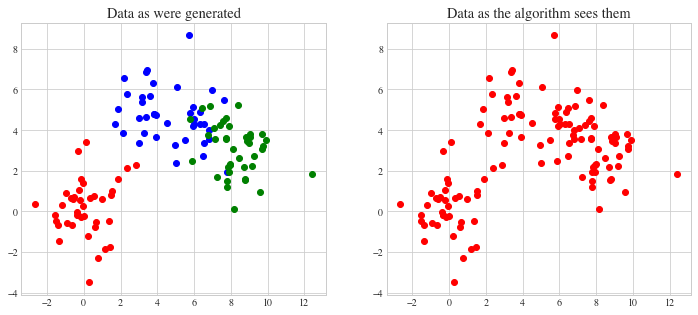

In [2]:
#Create some data
MAXN=40
X = np.concatenate([1.25*np.random.randn(MAXN,2), 5+1.5*np.random.randn(MAXN,2)]) 
X = np.concatenate([X,[8,3]+1.2*np.random.randn(MAXN,2)])

#Just for visualization purposes, create the labels of the 3 distributions
y = np.concatenate([np.ones((MAXN,1)),2*np.ones((MAXN,1))])
y = np.concatenate([y,3*np.ones((MAXN,1))])

plt.subplot(1,2,1)
plt.scatter(X[(y==1).ravel(),0],X[(y==1).ravel(),1],color='r')
plt.scatter(X[(y==2).ravel(),0],X[(y==2).ravel(),1],color='b')
plt.scatter(X[(y==3).ravel(),0],X[(y==3).ravel(),1],color='g')
plt.title('Data as were generated')

plt.subplot(1,2,2)
plt.scatter(X[:,0],X[:,1],color='r')
plt.title('Data as the algorithm sees them')
plt.show()

One thing I noticed: In the overlap between the blue and green clusters, we just have points.  Remember, the points don't really have labels (in this case colors).  We just did that to illustrate what the program is doing.  We are asking the algorithm to somehow separate the green and blue dots.  Look at the two dots at roughly (5.9, 5.5).  These two points are very close together, but the 'correct' answer is that they are in different groups.

The K-means implementation uses the Silhouette metric to evaluate the effectiveness, and this requires generating a large $ n \times n $ matrix.  To make things more efficient, the code attempts to use the graphics accelerator on the computer.  But this doesn't work on a Mac.  So the code fails.  So at this point I stop talking about K-means!  Read it in the book!

# FROM HERE IT DIES ON MAC

clf = cluster.KMeans(init='random', n_clusters=3, n_init=10, max_iter=300, random_state=12)
clf.fit(X)

print clf.labels_    # or
print clf.predict(X) # equivalent

plt.scatter(X[(y==1).ravel(),0],X[(y==1).ravel(),1],color='r')
plt.scatter(X[(y==2).ravel(),0],X[(y==2).ravel(),1],color='b')
plt.scatter(X[(y==3).ravel(),0],X[(y==3).ravel(),1],color='g')

fig = plt.gcf()
fig.set_size_inches((6,5))

## Spectral Clustering

With the K-means cluster algorithm, clusters are formed based on _compactness_.  For Spectral clustering, clusters are formed based on _connectivity_.

The algorithm needs an algorithm for determing a "distance" between two samples.  In many case this "distance" is in fact the distance between the samples.  We then want samples from the same cluster to be somewhat close together, but samples from different clusters to be further apart.

That is a bit of a simplification, however.  Suppose we have a sequence of samples, $ p_0, p_1,..., p_n $, where $ p_0 $ is very close to $ p_1 $, and $ p_1 $ is close to $ p_2 $, and so on.  So each of these neighboring pairs are close together, and hence should be in the same cluster.  However, $ p_0 $ might be quite distance from $ p_n $, and there may be samples from other clusters that are closer to $ p_0 $ than $p_n$ is.

I would dig more into this algorithm, but for two things:

* We don't have to understand the complex math of how the algorithm works to be able to use the algorithm, we just need to get a feel for what the results look like, and

* This also dies on the Mac.  So we will move along.  See the book!

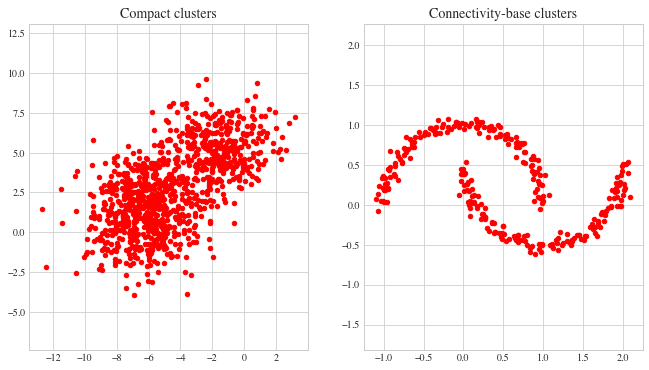

In [3]:
X, labels_true = make_blobs(n_samples=1000, centers=3, cluster_std=[1.7,1.7,1.7])

plt.subplot(1,2,1)
plt.scatter(X[:, 0], X[:, 1], c='r', marker='o',s=20) 
plt.axis('equal')
plt.title('Compact clusters',size=14)

[Xmoons, ymoons] = make_moons(n_samples=300, noise=.05)
plt.subplot(1,2,2)
plt.scatter(Xmoons[:, 0], Xmoons[:, 1], c='r', marker='o',s=20) 
plt.axis('equal')
plt.title('Connectivity-base clusters', size=14)
fig = plt.gcf()
fig.set_size_inches((11,6))

# THIS ALSO DIES:

colors = np.array([x for x in 'bgrcmykbgrcmykbgrcmykbgrcmyk'])
colors = np.hstack([colors] * 20)
 
# normalize dataset for easier parameter selection
X = StandardScaler().fit_transform(Xmoons)
 
# Compute distances
distances = euclidean_distances(Xmoons)
    
spectral = cluster.SpectralClustering(n_clusters=2, 
                                      affinity="nearest_neighbors")
 
spectral.fit(Xmoons)
y_pred = spectral.labels_.astype(np.int)

## Hierarchical Clustering

There are several hierarchical clustering algorithms.  Some start with all of the samples in one cluster, then repeatedly split clusters into smaller clusters, and when this is taken to extremes, each sample is in its own cluster.  Others start with each of the samples in its own cluster, then repeatedly join two clusters into one, and when this is taken to extremes, only a single cluster remains containing all of the samples.  The key in both of these instances is to stop the splitting or merging when there is the right number of clusters, _K_.

We will be looking at _agglomerative clustering_, which is a bottom-up algorithm.

At each step in the merging, we want to find the two "closest" clusters, then merge them into one.  But how do we define the "closeness" or "similarity" of two clusters?

* _Maximum_ or _complete_ linkage minimizes the maximum distance between samples of a pair of clusters.  Based on the similariy of the two least similar members of the clusters, this clustering tends to give tight spherical clusters.

* _Average_ linkage averages similarity between members, it minimizes the average of the distances between all samples in a pair of clusters.

* _Single_ linkage uses the similarity between the two most similar samples of the clusters.

* _Ward_ linkage minimizes the sum of squared differences within all clusters.  It is thus a variance-minimizing approach and in this sense is similar to the K-means function.

The following example generates a number of samples.  The _y1_ array indicates which 'cluster' in which the sample were generated.  In the following plots, the samples are drawn with a character that indicates the original cluster and in a color that indicates the cluster as chosen by the algorithm.  _Note: in real life data, the points do not have an 'original' cluster!_

### Funny Note

I ran the code as written in the book.  The resulting pictures looked **identical** to me!  I looked in the later version of the book, and again, they were identical.  I looked at the code: they ran the clustering algorithm _but they never used the output of the clustering_, so they were indeed drawing the identical image.

So I looked on-line for another example, saw how they found the output of the clustering, then applied that to this code.  And now these pictures look different!

In [4]:
MAXN1 = 500
MAXN2 = 400
MAXN3 = 300
X1 = np.concatenate ([2.25*np.random.randn(MAXN1,2),4+1.7* np.random.randn (MAXN2 ,2)])
X1 = np.concatenate ([X1,[8,3]+1.9* np.random.randn(MAXN3 ,2)])
y1 = np.concatenate ([ np.ones ((MAXN1,1)),2* np.ones((MAXN2,1))])
y1 = np.concatenate ([y1,3* np.ones((MAXN3,1))]).ravel()
y1 = np.int_(y1)
labels_y1=['+','*','o']
colors=['r','g', 'b']

That just generated the data.  The following will plot the data.  It takes a little bit of time for each plot to form, and they are drawn one at a time, so give this a minute or two to complete!

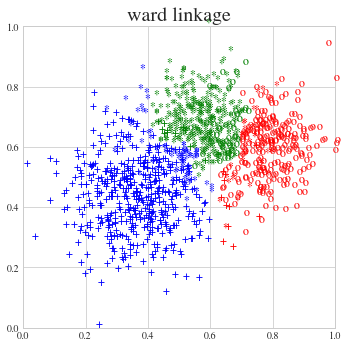

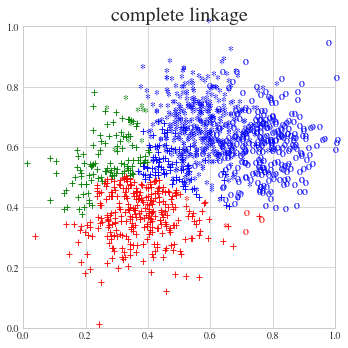

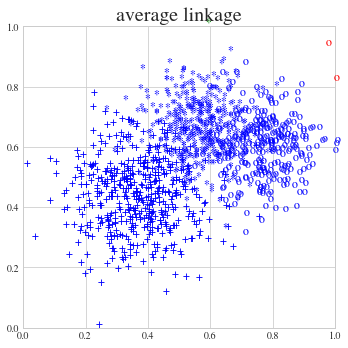

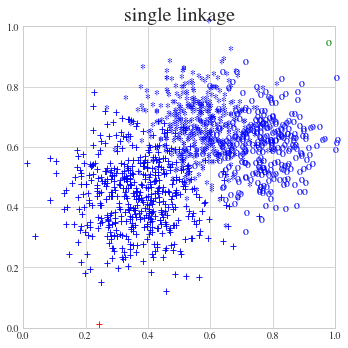

In [5]:
for linkage in ('ward', 'complete', 'average', 'single'):
    clustering = AgglomerativeClustering(linkage=linkage,n_clusters =3)
    clustering.fit(X1)
    yp = clustering.labels_.astype(int)
    x_min , x_max = np.min (X1, axis =0) , np.max (X1,axis =0)
    X1 = (X1 - x_min ) / ( x_max - x_min )
    fig = plt.figure ()
    fig.set_size_inches((5,5))
    for i in range (X1.shape [0]) :
        plt.text(X1[i,0],X1[i,1],labels_y1[y1[i]-1],color=colors[yp[i]-1])
    plt.title ("%s linkage" % linkage,size =20)
    plt.tight_layout()
    
plt.show()

In many cases, the agglomerative clustering can generate very unbalanced cluster sizes.  Average linking is worst at this.  Ward linkage tries to form compact clusters.

For non-geometric problems, Average linkage actually works well.